<a href="https://colab.research.google.com/github/darkness071104/submission/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fauzan Ramadhan Putra
- **Email:** fauzanramadhanputra.7f@gmail.com
- **ID Dicoding:** fauzanramadhanputra

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan jumlah penyewa sepeda disetiap tahun berdasarkan musim?
- Apakah musim/season mempengaruhi jumlah penyewa sepeda?
- Bagaimana perbandingan jumlah penyewa yang sudah terdaftar (registered) atau belum (casual) disetiap tahun?

## Import Semua Packages/Library yang Digunakan

In [ ]:
# Melakukan import untuk packages/library yang digunakan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

* Data wrangling merupakan sebuah proses atau kumpulan kegiatan yang meliputi
pengumpulan data **(Gathering data)**, penilaian data **(Assessing data)**, serta pembersihan data **(Cleaning data)** sebelum data digunakan dalam proses analisis data

### Gathering Data

**Proses pertama pada data wrangling adalah gathering data**

> Pada proses ini kita akan mengumpulkan semua data yang dibutuhkan untuk menjawab semua pertanyaan atau masalah bisnis yang ingin kita hadapi.

> untuk analisis data kali ini saya memilih datasetnya yaitu Bike Sharing Dataset dan pada dataset tersebut terdapat 2 tabel yaitu tabel **day.csv** dan tabel **hour.csv**




In [ ]:
# membaca data tabel day.csv dari URL repository github saya dan memuatnya ke dalam sebuah DataFrame yang disebut 'day_df'
day_df = pd.read_csv("https://raw.githubusercontent.com/darkness071104/submission/main/data/day.csv")
# lalu untuk menampilkan lima baris pertama pada data yang sudah diambil kita bisa menggunakan head()
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# membaca data tabel hour.csv dari URL repository github saya dan memuatnya ke dalam sebuah DataFrame yang disebut 'hour_df'
hour_df = pd.read_csv("https://raw.githubusercontent.com/darkness071104/submission/main/data/hour.csv")
# lalu untuk menampilkan lima baris pertama pada data yang sudah diambil kita bisa menggunakan head()
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Proses kedua pada data wrangling adalah Assessing Data**
> Proses ini dilakukan untuk menilai kualitas dan struktur dari sebuah data. Selain itu, proses ini juga bertujuan untuk mengidentifikasi berbagai masalah yang terdapat dalam data, seperti missing value, unstandard value, dll.

#### Menilai tabel `day_df`

In [ ]:
# Menampilkan informasi rinci tentang struktur dan karakteristik dari DataFrame 'day_df', diantaranya adalah jumlah baris dan kolom, tipe data kolom, serta keberadaan nilai yang hilang
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


> Dapat dilihat pada hasil 'hour_df.info()' tidak terdapat missing values karena jumlah data pada setiap kolomnya sama yaitu 731

> Hanya ada satu masalah yaitu type data pada kolom dteday, seharusnya typenya datetime bukan object

In [ ]:
# Menghitung missing values untuk setiap kolom pada DataFrame'day_df'
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

> Dari pengecekan missing values diatas terlihat bahwa setiap kolom tidak terdapat missing value karena jumlahnya 0 semua

In [ ]:
# Menampilkan jumlah baris duplikat dalam DataFrame 'day_df'
print("Jumlah duplikasi: ", day_df.duplicated().sum())
# Menampilkan rangkuman statistik deskriptif untuk kolom-kolom numerik dalam DataFrame 'day_df', seperti jumlah, rata-rata, nilai minimum, kuartil, median, dan nilai maksimum.
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour_df`

In [ ]:
# Menampilkan informasi rinci tentang struktur dan karakteristik dari DataFrame 'hour_df', diantaranya adalah jumlah baris dan kolom, tipe data kolom, serta keberadaan nilai yang hilang
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


> Dapat dilihat pada hasil 'hour_df.info()' tidak terdapat missing values karena jumlah data pada setiap kolomnya sama yaitu 17379

> Hanya ada satu masalah yaitu type data pada kolom dteday, seharusnya typenya datetime bukan object

In [ ]:
# Menghitung missing values untuk setiap kolom pada DataFrame hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

> Dari pengecekan missing values diatas terlihat bahwa setiap kolom tidak terdapat missing value karena jumlahnya 0 semua

In [ ]:
# Menampilkan jumlah baris duplikat dalam DataFrame 'hour_df'
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
# Menampilkan rangkuman statistik deskriptif untuk kolom-kolom numerik dalam DataFrame 'hour_df', seperti jumlah, rata-rata, nilai minimum, kuartil, median, dan nilai maksimum.
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

**Proses ketiga dan terakhir dari data wrangling adalah Cleaning Data**
> Pada proses ini dilakukan pembersihan data untuk menghilangkan missing value, outlier, dll yang telah kita temukan pada proses assessing data

> Pada proses assessing data sebelumnya, menurut saya hanya ada satu masalah yaitu type data pada kolom dteday. Dimana pada awalnya kolom tersebut bertype objek seharusnya kolom tersebut bertype datetime

####Cleaning data DataFrame 'day_df'

> Melakukan cleaning data pada DataFrame 'day_df'

In [ ]:
# Melakukan rename pada kolom yang akan kita gunakan agar lebih mudah dalam membaca hasilnya
day_df.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month'}, inplace=True)
# Melakukan perubahan type pada kolom date, (object -> datetime)
day_df['date'] = pd.to_datetime(day_df['date'])
# Menampilkan informasi rinci tentang struktur dan karakteristik dari DataFrame 'day_df', diantaranya adalah jumlah baris dan kolom, tipe data kolom, serta keberadaan nilai yang hilang
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

> Dapat dilihat bahwa nama dari kolomnya sudah berubah ( 'dteday' -> 'date', 'yr' -> 'year', 'mnth' -> 'month') dan type dari kolom date sudah berubah jadi datetime

In [ ]:
# Lalu kita melakukan replace nilai dari setiap kolom yang sudah kita rubah typenya sesuai dengan arahan dari file readme.txt

# Melakukan replace untuk kolom season
day_df.season.replace((1,2,3,4), ('Springer', 'Summer', 'Fall', 'Winter'), inplace=True)

# Melakukan replace untuk kolom year
day_df.year.replace((0,1), ('2011','2012'), inplace=True)

# Melakukan replace untuk kolom month
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Melakukan replace untuk kolom weathersit
day_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_Snow','Heavy_Rain'), inplace=True)

# Melakukan replace untuk kolom weekday
day_df.weekday.replace((0,1,2,3,4,5,6),('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'), inplace=True)

# Melakukan replace untuk kolom workingday
day_df.workingday.replace((0,1),('No', 'Yes'),inplace=True)

day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,Jan,0,Saturday,No,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,Jan,0,Sunday,No,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,Jan,0,Monday,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,Jan,0,Tuesday,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,Jan,0,Wednesday,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   year        731 non-null    object        
 4   month       731 non-null    object        
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

> Dapat dilihat bahwa nilai dari kolom 'season', 'year', 'month', 'weathersit', 'weekday', 'workingday' telah berubah sesuai dengan arahan dari readme.txt dan juga type datanya akan ikut berubah sesuai jenis data yang diganti

####Cleaning data DataFrame 'hour_df'

> Melakukan cleaning data pada DataFrame 'day_df'

In [ ]:
# Melakukan rename pada kolom yang akan kita gunakan agar lebih mudah dalam membaca hasilnya
hour_df.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month'}, inplace=True)
# Melakukan perubahan type pada kolom date, (object -> datetime)
hour_df['date'] = pd.to_datetime(hour_df['date'])
# Menampilkan informasi rinci tentang struktur dan karakteristik dari DataFrame 'day_df', diantaranya adalah jumlah baris dan kolom, tipe data kolom, serta keberadaan nilai yang hilang
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

> Dapat dilihat bahwa nama dari kolomnya sudah berubah ( 'dteday' -> 'date', 'yr' -> 'year', 'mnth' -> 'month') dan type dari kolom date sudah berubah jadi datetime

In [ ]:
# Lalu kita melakukan replace nilai dari setiap kolom yang sudah kita rubah typenya sesuai dengan arahan dari file readme.txt

# Melakukan replace untuk kolom season
hour_df.season.replace((1,2,3,4), ('Springer', 'Summer', 'Fall', 'Winter'), inplace=True)

# Melakukan replace untuk kolom year
hour_df.year.replace((0,1), (2011,2012), inplace=True)

# Melakukan replace untuk kolom month
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Melakukan replace untuk kolom weathersit
hour_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_Snow','Heavy_Rain'), inplace=True)

# Melakukan replace untuk kolom weekday
hour_df.weekday.replace((0,1,2,3,4,5,6),('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'), inplace=True)

# Melakukan replace untuk kolom workingday
hour_df.workingday.replace((0,1),('No', 'Yes'),inplace=True)

hour_df.head()

,instant,date,season,year,month,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,Jan,0,0,Saturday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,Jan,1,0,Saturday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,Jan,2,0,Saturday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,Jan,3,0,Saturday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,Jan,4,0,Saturday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   year        17379 non-null  int64         
 4   month       17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  object        
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

> Dapat dilihat bahwa nilai dari kolom 'season', 'year', 'month', 'weathersit', 'weekday', 'workingday' telah berubah sesuai dengan arahan dari readme.txt dan juga type datanya akan ikut berubah sesuai jenis data yang diganti

## Exploratory Data Analysis (EDA)

### Explore Data day_dt

In [ ]:
# lalu untuk menampilkan lima baris pertama pada data yang sudah diambil kita bisa menggunakan head()
day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,Jan,0,Saturday,No,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,Jan,0,Sunday,No,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,Jan,0,Monday,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,Jan,0,Tuesday,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,Jan,0,Wednesday,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Menampilkan rangkuman parameter statistiik dari data day_df
day_df.describe(include="all")

<ipython-input-162-676f4a13a600>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731.000000,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,2,12,NaN,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,2012,Jan,NaN,Saturday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,366,62,NaN,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,0.028728,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,NaN,NaN,0.167155,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [ ]:
# Melakukan pengelompokkan data berdasarkan musim dan menghitung statistik agregat
day_df.groupby(by="season").agg({
    # Statistik agregat untuk jumlah total penyewa (cnt)
    "cnt": ["max", "min", "sum", "mean"],

    # Statistik agregat untuk jumlah penyewa tidak terdaftar (casual)
    "casual": ["max", "min", "sum", "mean"],

    # Statistik agregat untuk jumlah penyewa terdaftar (registered)
    "registered": ["max", "min", "sum", "mean"]
})


cnt                             casual                            \
           max   min      sum         mean    max  min     sum         mean   
season                                                                        
Fall      8714  1115  1061129  5644.303191   3160  118  226091  1202.611702   
Springer  7836   431   471348  2604.132597   3155    9   60622   334.928177   
Summer    8362   795   918589  4992.331522   3410  120  203522  1106.097826   
Winter    8555    22   841613  4728.162921   3031    2  129782   729.112360   

         registered                            
                max  min     sum         mean  
season                                         
Fall           6917  889  835038  4441.691489  
Springer       5315  416  410726  2269.204420  
Summer         6456  674  715067  3886.233696  
Winter         6946   20  711831  3999.050562

In [ ]:
# Melakukan pengelompokkan data berdasarkan musim dan tahun, kemudian menghitung total jumlah penyewa sepeda untuk setiap kelompok
day_df.groupby(["season", "year"])["cnt"].sum().reset_index()

,season,year,cnt
0,Fall,2011,419650
1,Fall,2012,641479
2,Springer,2011,150000
3,Springer,2012,321348
4,Summer,2011,347316
5,Summer,2012,571273
6,Winter,2011,326137
7,Winter,2012,515476


In [ ]:
# Melakukan pengelompokkan data berdasarkan musim, kemudian menghitung rata-rata jumlah penyewa sepeda untuk setiap kelompok
day_df.groupby(["season"])["cnt"].mean().reset_index()

,season,cnt
0,Fall,5644.303191
1,Springer,2604.132597
2,Summer,4992.331522
3,Winter,4728.162921


In [ ]:
# Melakukan pengelompokkan data berdasarkan tahun dan menghitung statistik agregat
day_df.groupby(by="year").agg({
    # Statistik agregat untuk jumlah penyewa tidak terdaftar (casual)
    "casual": ["max", "min", "sum", "mean"],

    # Statistik agregat untuk jumlah penyewa terdaftar (registered)
    "registered": ["max", "min", "sum", "mean"]
})

casual                          registered                           
        max min     sum         mean        max  min      sum         mean
year                                                                      
2011   3065   9  247252   677.402740       4614  416   995851  2728.358904
2012   3410   2  372765  1018.483607       6946   20  1676811  4581.450820

In [ ]:
# Melakukan pengelompokkan data berdasarkan tahun, kemudian menghitung total jumlah penyewa Registered dan Casual
day_df.groupby(["year"]).agg({
    "casual": ["sum"],
    "registered": ["sum"]
}).reset_index()

,year,casual,registered
,,sum,sum
0,2011,247252,995851
1,2012,372765,1676811


### Explore Data hour_dt

> karena pada pernyataan bisnis saya tidak ada analisis data menggunakan jam, maka saya tidak melakukan explore pada data hour_dt

### Menggabungkan Data day_df dan hour_df

In [ ]:
all_df  = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="instant",
    right_on="instant",
    suffixes=('_day', '_hour')
)
all_df.head()

,instant,date_day,season_day,year_day,month_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,...,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
0,1,2011-01-01,Springer,2011,Jan,0,Saturday,No,Misty,0.344167,...,Saturday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,Springer,2011,Jan,0,Sunday,No,Misty,0.363478,...,Saturday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,Springer,2011,Jan,0,Monday,Yes,Clear,0.196364,...,Saturday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,Springer,2011,Jan,0,Tuesday,Yes,Clear,0.200000,...,Saturday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,Springer,2011,Jan,0,Wednesday,Yes,Clear,0.226957,...,Saturday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
all_df.to_csv("main_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan jumlah penyewa sepeda disetiap tahun berdasarkan musim?

> Untuk memvisaulisasikan pertanyaan diatas kita perlu menggunakan clustering/pengelompokan, dimana saya mengelompokan data berdasarkan tahunya untuk melihat persebaran jumlah penyewa berdasarkan musim disetiap tahunnya

In [ ]:
# Membuat variabel untuk menyimpan hasil pengelompokkan data berdasarkan musim dan tahun, kemudian menghitung total jumlah penyewa sepeda untuk setiap kelompok
by_season_year_df = day_df.groupby(["season", "year"])["cnt"].sum().reset_index()
print(by_season_year_df)

     season  year     cnt
0      Fall  2011  419650
1      Fall  2012  641479
2  Springer  2011  150000
3  Springer  2012  321348
4    Summer  2011  347316
5    Summer  2012  571273
6    Winter  2011  326137
7    Winter  2012  515476


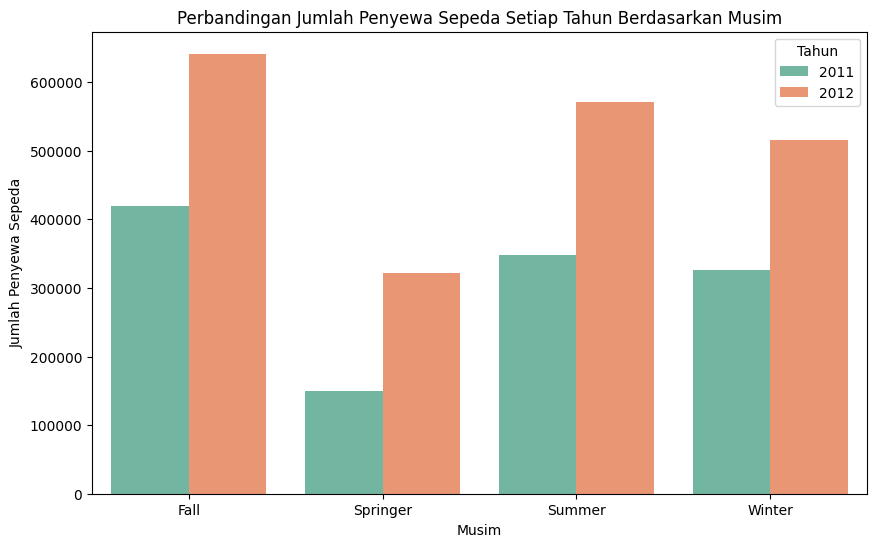

In [ ]:
# Membuat bar chart
plt.figure(figsize=(10, 6))

sns.barplot(
    x="season",
    y="cnt",
    hue="year",
    data=by_season_year_df,
    palette="Set2",
)

plt.title('Perbandingan Jumlah Penyewa Sepeda Setiap Tahun Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.legend(title='Tahun')

plt.show()

### Pertanyaan 2: Apakah musim/season mempengaruhi jumlah penyewa sepeda?

In [ ]:
# Membuat variabel untuk menyimpan hasil pengelompokkan data berdasarkan musim, kemudian menghitung rata-rata jumlah penyewa sepeda untuk setiap kelompok
by_season_mean=day_df.groupby(["season"])["cnt"].mean().reset_index()
print(by_season_mean)

     season          cnt
0      Fall  5644.303191
1  Springer  2604.132597
2    Summer  4992.331522
3    Winter  4728.162921


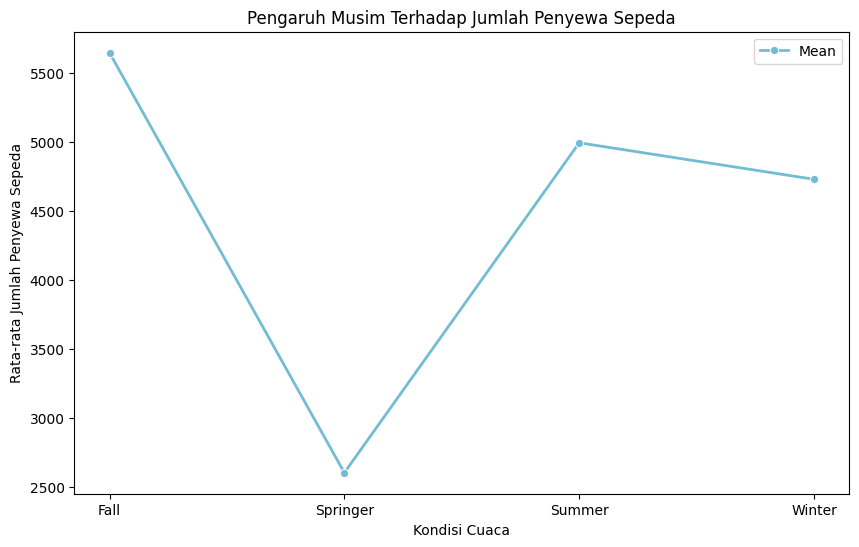

In [ ]:
# Membuat line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=by_season_mean, x='season', y='cnt', marker='o', linewidth=2, color="#72BCD4", label='Mean')
plt.title('Pengaruh Musim Terhadap Jumlah Penyewa Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewa Sepeda')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend()
plt.show()

### Pertanyaan 3: Bagaimana perbandingan jumlah penyewa yang sudah terdaftar (registered) atau belum (casual) disetiap tahun?

> Untuk memvisaulisasikan pertanyaan diatas kita perlu menggunakan clustering/pengelompokan, dimana saya mengelompokan data berdasarkan tahunya untuk melihat persebaran jumlah penyewa Registered dan Casual

In [ ]:
# Membuat variabel untuk menyimpan hasil pengelompokkan data berdasarkan tahun, kemudian menghitung total jumlah penyewa Registered dan Casual
perbandingan_df = day_df.groupby(["year"]).agg({
    "casual": ["sum"],
    "registered": ["sum"]
}).reset_index()

print(perbandingan_df)

   year  casual registered
            sum        sum
0  2011  247252     995851
1  2012  372765    1676811


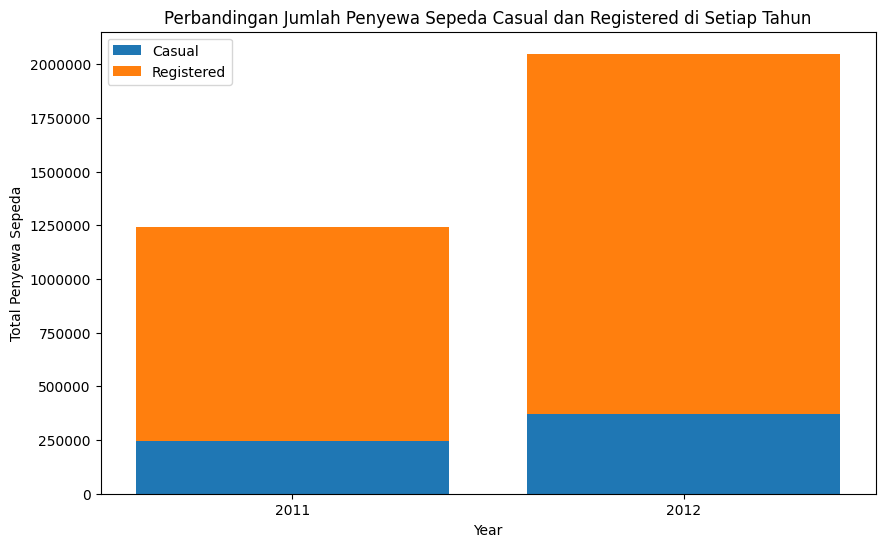

In [ ]:
# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(perbandingan_df["year"], perbandingan_df[("casual", "sum")], label="Casual")
plt.bar(perbandingan_df["year"], perbandingan_df[("registered", "sum")], bottom=perbandingan_df[("casual", "sum")], label="Registered")
plt.xlabel("Year")
plt.ylabel("Total Penyewa Sepeda")
plt.title("Perbandingan Jumlah Penyewa Sepeda Casual dan Registered di Setiap Tahun")
plt.legend()

# Mengatur label sumbu y agar ditampilkan dalam format yang lebih mudah dibaca
plt.ticklabel_format(style='plain', axis='y')

plt.show()

## Conclusion

- Conclution pertanyaan 1 :
> Berdasarkan bar chart **Perbandingan Jumlah Penyewa Sepeda Setiap Tahun Berdasarkan Musim** pada tahun 2011 jumlah penyewa terbesar ada dimusim **fall** dengan jumlah penyewanya sebanyak **419650** dan jumlah penyewa terkecil ada dimusim **Springer** dengan jumlah penyewanya sebanyak **150000**. Lalu pada tahun 2012 jumlah penyewa terbesar ada dimusim **fall** dengan jumlah penyewanya sebanyak **641479** dan jumlah penyewa terkecil ada dimusim **Springer** dengan jumlah penyewanya sebanyak **321348**. Pada bar chart tersebut kita juga bisa melihat bahwa jumlah penyewa sepeda dari tahun 2011 ke tahun 2012 mengalami kenaikan yang cukup signifikan disemua musimnya

- Conclution pertanyaan 2 :
> Berdasarkan line chart **Pengaruh Musim Terhadap Jumlah Penyewa Sepeda** musim/season sangat mempengaruhi jumlah penyewa sepeda, dimana Kebanyakan orang menyewa sepeda pada musim **fall** dan pada musim **Springer** orang jarang menyewa sepeda. Rata-rata jumlah penyewa di musim **fall** adalah **5644.303191** dan di musim **Springer** rata-ratanya adalah **2604.132597**

- Conclution pertanyaan 3 :
> Berdasarkan bar chart **Perbandingan Jumlah Penyewa Sepeda Casual dan Registered di Setiap Tahun**, pada tahun 2011 Penyewa Registered (995851 Penyewa) **lebih banyak** dibanding dengan Penyewa Casual (247252 Penyewa) dan pada tahun 2012 juga sama yaitu Penyewa Registered (1676811 Penyewa) **lebih banyak** dibanding dengan Penyewa Casual (372765 Penyewa), jadi pada 2 tahun terakhir Penyewa Registered **lebih banyak** dibanding dengan Penyewa Casual